In [2]:
import seaborn
import torch

In [3]:
graphs = torch.load('datasets/SG256_Full_Graphs_From_Enzo.pt')

In [4]:
dark_matter_masses = []
stellar_masses = []
redshifts = []
for graph in graphs:
  for x in graph.x:
    dark_matter_masses.append(x[0].item())
    redshifts.append(x[1].item())
  for y in graph.y:
    stellar_masses.append(y.item())

In [5]:
dark_matter_masses

[116405896.0,
 99970192.0,
 79496344.0,
 74832360.0,
 44315300.0,
 43987480.0,
 33199224.0,
 23737148.0,
 22559976.0,
 19848010.0,
 14185665.0,
 13197735.0,
 8509909.0,
 5334525.0,
 5480554.0,
 3731187.5,
 419311.5625,
 8511399.0]

In [6]:
stellar_masses

[23684.521484375,
 5445.07763671875,
 4016.001708984375,
 11307.224609375,
 6223.611328125,
 8910.271484375,
 1256.077392578125,
 2069.839599609375,
 1362.23046875,
 2373.189697265625,
 1124.407958984375,
 2081.538330078125,
 767.02685546875,
 14571.1025390625,
 3780.94384765625,
 2080.88671875,
 959.7943115234375,
 316.7570495605469]

In [7]:
redshifts

[9.325244903564453,
 9.36806583404541,
 9.327377319335938,
 9.325244903564453,
 9.325244903564453,
 9.36806583404541,
 9.333780288696289,
 9.325244903564453,
 9.405826568603516,
 9.392849922180176,
 9.325244903564453,
 9.327377319335938,
 9.362693786621094,
 9.57082462310791,
 9.41775131225586,
 9.493180274963379,
 10.106175422668457,
 9.349823951721191]

Text(0, 0.5, 'Stellar Mass (MSun)')

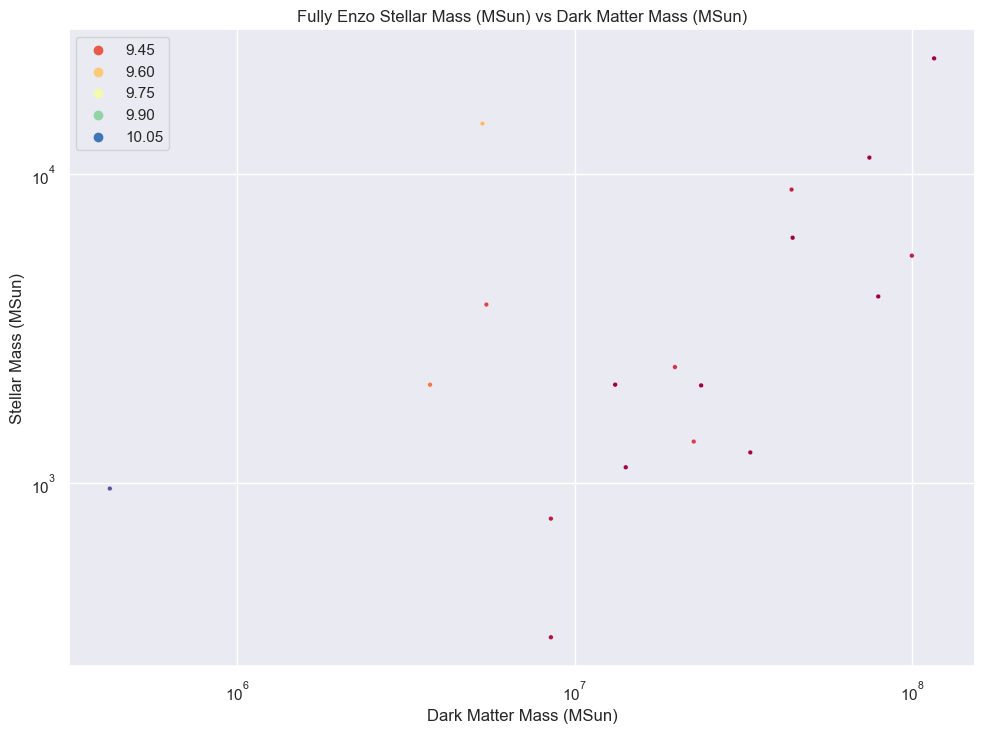

In [8]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
ax = seaborn.scatterplot(x=dark_matter_masses, y=stellar_masses, hue=redshifts, palette='Spectral',s=12)
ax.set_title('Fully Enzo Stellar Mass (MSun) vs Dark Matter Mass (MSun)')
ax.set_xscale('log')
ax.set_xlabel('Dark Matter Mass (MSun)')
ax.set_yscale('log')
ax.set_ylabel('Stellar Mass (MSun)')